# FIDE chess players

As a chess lover, I wanted to do a little project with data and chess. The goal of this project is to do an exploratory data analysis (EDA) with a dataset I downloaded on the FIDE (International Chess Federation) website [here](https://ratings.fide.com/download.phtml) into a txt file and then I opened it with Excel to make it a csv file.



The data being messy a first part of cleaning is necessary. 

In the second part, we will analyze several chess related features in order to find some interesting statistics and find some outliers. The features we will analyze are the following :

- Elo rating : 
    - Plotting elo distribution
- Titles : 
     - What are the titles in chess ? 
     - How are the titles distributed ? 
     - Identify strong IMs, FMs, etc...
- Gender distribution : 
    - What is the percentage of male and female ? 
    - Which countries have the strongest women chess culture ?
- Age : 
    - Plotting age distribution
    - Who will be the next Magnus Carlsen ? 
    - Who is the oldest player ?
- Countries : 
    - Which countries have the most players ? 
     - Which countries have the most GMs ? 
     - Which countries have the highest density of titled players ? 
     - Which countries have the highest and lowest mean elo ?

This project was made in january 2024 so the ratings we will analyze are from this month.


### Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('jan_24_FIDE.csv', sep=';')

In [3]:
df.head(15)

,ID Number,Name,Fed,Sex Tit WTit OTit,FOA JAN24,Gms,K,B-day,Flag
0,2521997,NaN,IRL,M,1668,0,40,0,NaN
1,10245154,"A B M Jobair, Hossain",BAN,M,1583,0,40,1998,NaN
2,25121731,A C J John,IND,M,1063,0,40,1987,i
3,35077023,A Chakravarthy,IND,M,1151,0,40,1986,i
4,10207538,"A E M, Doshtagir",BAN,M,1840,0,40,1974,i
5,10680810,"A hamed Ashraf, Abdallah",EGY,M,1728,0,40,2001,i
6,5716365,"A Hamid, Harman",MAS,M,1325,0,40,1970,i
7,10206612,"A K M, Sourab",BAN,M,1598,0,20,0,i
8,5045886,"A K, Kalshyan",IND,M,1671,0,20,1964,i
9,8605360,"A La, Teng Hua",CHN,F,1915,0,40,1993,wi


## Data cleaning 

The data is a bit messy, especially the column names which contains a lot of spaces. To bring some order in all of that, we will first remove the useless columns and rename the remaining columns.

In [4]:
df.columns

Index(['ID Number', 'Name', 'Fed', 'Sex Tit  WTit OTit', 'FOA JAN24', 'Gms',
       'K', 'B-day', 'Flag'],
      dtype='object')

In [5]:
df = df.drop(['ID Number','Gms','K'], axis=1)
df.columns=[ 'Name', 'Fed', 'Sex', 'Elo','Bday','IsActive']

df.head(15)

,Name,Fed,Sex,Elo,Bday,IsActive
0,NaN,IRL,M,1668,0,NaN
1,"A B M Jobair, Hossain",BAN,M,1583,1998,NaN
2,A C J John,IND,M,1063,1987,i
3,A Chakravarthy,IND,M,1151,1986,i
4,"A E M, Doshtagir",BAN,M,1840,1974,i
5,"A hamed Ashraf, Abdallah",EGY,M,1728,2001,i
6,"A Hamid, Harman",MAS,M,1325,1970,i
7,"A K M, Sourab",BAN,M,1598,0,i
8,"A K, Kalshyan",IND,M,1671,1964,i
9,"A La, Teng Hua",CHN,F,1915,1993,wi


We are not done yet with the cleaning. 


The column *Sexe* contains not only the sex of the player but also his title (if he has one) and other info (trainer, arbiter, etc...) that we don't need. I will create a new column with the player's title. I will talk in detail about all the FIDE titles one can achieve, later in this notebook.

The *IsActive* column contains a *NaN* if a player is active and *i* or *wi* if a player is inactive. I will replace this by *yes* or *no*. A player is considered to be active if he has played at least one game since 1 year.


In [6]:
df.IsActive.unique()

array([nan, 'i', 'wi', 'w'], dtype=object)

In [7]:


def find_title(title):
    if len(title)==1:
        return None
    elif title[4]=='W':
        return title[4:7]
    elif title[4] != 'W' and title[4] != ' ' :
        return title[4:6]
    else:
        return None

def find_sexe(sexe):
    return sexe[0]

def activity(a):
    if a== 'i'  or a=='wi':
        return 'No'
    return 'Yes'




df['Title']=df['Sex'].apply(find_title)
df['Sex']=df['Sex'].apply(find_sexe)
df['IsActive']= df['IsActive'].apply(activity)
df['Elo']=df['Elo'].str.replace('[a-zA-Z]', '', regex=True)



In [8]:
df.head(15)

,Name,Fed,Sex,Elo,Bday,IsActive,Title
0,NaN,IRL,M,1668,0,Yes,None
1,"A B M Jobair, Hossain",BAN,M,1583,1998,Yes,None
2,A C J John,IND,M,1063,1987,No,None
3,A Chakravarthy,IND,M,1151,1986,No,None
4,"A E M, Doshtagir",BAN,M,1840,1974,No,None
5,"A hamed Ashraf, Abdallah",EGY,M,1728,2001,No,None
6,"A Hamid, Harman",MAS,M,1325,1970,No,None
7,"A K M, Sourab",BAN,M,1598,0,No,None
8,"A K, Kalshyan",IND,M,1671,1964,No,None
9,"A La, Teng Hua",CHN,F,1915,1993,No,None


The *Fed* column contains the country code of the players. The country associated with each country code can be found on this [webpage](https://www.chessgames.com/alpha3.html). To make it more readable, I will replace the country code by the country name by scraping the data on the website mentioned just before.

In [9]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.chessgames.com/alpha3.html'

# Set a user-agent header to mimic a web browser
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the first <pre> tag containing country codes and names
    first_pre_tag = soup.find('pre')

    # Extract text content from the <pre> tag
    country_data_text = first_pre_tag.get_text()

    # Split the text into lines
    lines = country_data_text.split('\n')

    # Create a dictionary to store country codes and names
    country_code_dict = {}
    # Iterate over lines and extract country code and name
    for line in lines[1:-1]:
        parts = line.split(maxsplit=1)
        #print(parts)
        country_code, country_name = parts
        country_code_dict[country_code] = country_name

    print(country_code_dict)

else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


{'AFG': 'Afghanistan', 'AHO': 'Netherlands Antilles', 'ALB': 'Albania', 'ALG': 'Algeria', 'AND': 'Andorra', 'ANG': 'Angola', 'ARG': 'Argentina', 'ARM': 'Armenia', 'ARU': 'Aruba', 'AUS': 'Australia', 'AUT': 'Austria', 'AZE': 'Azerbaijan', 'BAH': 'Bahamas', 'BAN': 'Bangladesh', 'BAR': 'Barbados', 'BDI': 'Burundi', 'BEL': 'Belgium', 'BER': 'Bermuda', 'BHU': 'Bhutan', 'BIH': 'Bosnia & Herzegovina', 'BIZ': 'Belize', 'BLR': 'Belarus', 'BOL': 'Bolivia', 'BOT': 'Botswana', 'BRA': 'Brazil', 'BRN': 'Bahrain', 'BRU': 'Brunei', 'BUL': 'Bulgaria', 'BUR': 'Burkina Faso', 'CAF': 'Central African Republic', 'CAM': 'Cambodia', 'CAN': 'Canada', 'CGO': 'Congo', 'CHI': 'Chile', 'CIV': "Côte d'Ivoire", 'CHN': 'China', 'CMR': 'Cameroon', 'COL': 'Colombia', 'COM': 'Comoros Islands', 'CRC': 'Costa Rica', 'CRO': 'Croatia', 'CUB': 'Cuba', 'CYP': 'Cyprus', 'CZE': 'Czech Republic', 'DEN': 'Denmark', 'DOM': 'Dominican Republic', 'ECU': 'Ecuador', 'EGY': 'Egypt', 'ENG': 'England', 'ESA': 'El Salvador', 'ESP': 'Spai

In [10]:
df['Country'] = df['Fed'].replace(country_code_dict)

df = df.drop(columns=['Fed'])


Some countries are still missing, so I will create a list manually for the remaining codes.

In [11]:
country_code_dict2 = {'SGP':'Singapore','KOS':'Kosovo','LBN':'Lebanon','DJI':'Djibouti', 'CHA':'Chad','LBR':'Liberia',\
                      'SSD' : 'South Sudan','ERI':'Eritrea','LCA' : 'Saint Lucia','ANT':'Antigua and Barbuda',\
                      'CPV': 'Cape Verde','GEQ' :'Equatorial Guinea','DMA':'Dominica','COD':'Democratic Republic of Congo',\
                      'IOM': 'Isle of Man','VIN':'St. Vincent and the Grenadines','GRN':'Grenada', \
                      'SKN':'Saint Kitts and Nevis', 'NIG':'Niger'}

df['Country'] = df['Country'].replace(country_code_dict2)

To finish our cleaning, we can replace the birth year of the player by his age. That way it would be more visual.

As many players have 0 as their birth year, which would mean 2024 years old, we will replace them with NaN.

As the dataset was released in january, we can also remove 1 to (2024 - BirthYear), to get the real age.

In [12]:
import datetime
df['age'] = datetime.datetime.now().year - df['Bday'] -1
df.drop('Bday', axis=1,inplace=True)

df['age'] = df['age'].replace({2023 : np.NaN})

Finally lets check the data types.
Elo should be of type *int*

In [13]:
df.dtypes

Name         object
Sex          object
Elo          object
IsActive     object
Title        object
Country      object
age         float64
dtype: object

In [14]:
df.Elo=df.Elo.astype(int)

In [15]:
df.head(10)

,Name,Sex,Elo,IsActive,Title,Country,age
0,NaN,M,1668,Yes,None,Ireland,NaN
1,"A B M Jobair, Hossain",M,1583,Yes,None,Bangladesh,25.0
2,A C J John,M,1063,No,None,India,36.0
3,A Chakravarthy,M,1151,No,None,India,37.0
4,"A E M, Doshtagir",M,1840,No,None,Bangladesh,49.0
5,"A hamed Ashraf, Abdallah",M,1728,No,None,Egypt,22.0
6,"A Hamid, Harman",M,1325,No,None,Malaysia,53.0
7,"A K M, Sourab",M,1598,No,None,Bangladesh,NaN
8,"A K, Kalshyan",M,1671,No,None,India,59.0
9,"A La, Teng Hua",F,1915,No,None,China,30.0


We now have 7 columns to our dataset : 
- **Name** : the name of the player;
- **Country** : the country of the player;
- **Sex**: the sexe of the player;
- **Elo** : the FIDE Elo of a chess player which represents his chess strength. The FIDE Elo varies between 1001 and Magnus Carlsen (2830 at the time being).
- **age** : the year of birth of the player;
- **Title** : the chess title of the player. A title is earned by achieving some good performance in over the board tournaments;
- **IsActive** : if a player is active, meaning they have played at least one game in the last year.



Ok, we are done for now with the cleaning. 

In [16]:
#df.to_csv('FIDE_jan_2024.csv',index=False, sep=';')

## Exploratory data analysis

Let's get to the interesting part, the EDA. We will analyse several chess related features of the dataset, in order to find some pattern between the elo rating and the other features. 

First, I will create three visualization functions that will be useful later on this project.




In [17]:
def plot_distribution(df1,df2,title):  #plot elo distribution of df1 and df2 for comparison purposes
    my_perc=percentile = stats.percentileofscore(df1.Elo, 2111)
    my_perc2=percentile = stats.percentileofscore(df2.Elo, 2111)
    med = np.percentile(df1.Elo,50).round()
    med2 = np.percentile(df2.Elo,50).round()
    top3 = np.percentile(df1.Elo,97).round()
    top3_=np.percentile(df2.Elo,97).round()
    top1 = np.percentile(df1.Elo,99).round()
    top1_=np.percentile(df2.Elo,99).round()
    
    plt.figure(figsize=(20,10))
    
    plt.subplot(1,2,1)
    sns.histplot(data=df1, x='Elo')
    plt.axvline(x = 2111,color = 'r', label = 'Me top '+str(round(100 - my_perc,2))+'%')
    plt.axvline(x = med,color = 'y', label = 'Median = '+str(med))
    plt.axvline(x = top3,color = 'g', label = 'Top 3% = '+str(top3))
    plt.axvline(x = top1,color = 'm', label = 'Top 1% = '+str(top1))
    plt.xlabel('Elo')
    plt.ylabel('Number of players')
    plt.title('ELO Distribution of all players in ' +title)
    plt.legend()
    
    plt.subplot(1,2,2)
    sns.histplot(data=df2, x='Elo')
    plt.axvline(x = 2111,color = 'r', label = 'Me top '+str(round(100-my_perc2,2))+'%')
    plt.axvline(x = med2,color = 'y', label = 'Median = '+str(med2))
    plt.axvline(x = top3_,color = 'g', label = 'Top 3% ='+str(top3_) )
    plt.axvline(x = top1_,color = 'm', label = 'Top 1% ='+str(top1_))
    plt.xlabel('Elo')
    plt.ylabel('Number of players')
    plt.title('ELO Distribution of all active players in ' +title)
    plt.legend()
    
    
    plt.show()
    

def create_barplot(data,xlab,ylab,title,r=0,xlim=None):
    sns.set(style="whitegrid")

# Create a bar plot using Seaborn
    plt.figure(figsize=(7, 5))
    bar_plot = sns.barplot(x=data.values, y=data.index, palette="viridis")
    plt.title(title, fontsize=10)
    plt.xlabel(xlab, fontsize=8)
    plt.ylabel(ylab, fontsize=8)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_width().round(r)}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                          va='center', ha='left', xytext=(10, 0), textcoords='offset points', fontsize=8)

        
        
     # Set y-axis limits
    if xlim is not None:
        bar_plot.set_xlim(xlim[0], xlim[1])
    
    plt.tight_layout()
    plt.show()

    
    

    
def create_stackedbarplot(data,xlab,ylab,title):
    sns.set(style='whitegrid')

    # Create a stacked bar plot
    plt.figure(figsize=(12, 6))
    data.plot(kind='bar', stacked=True,
                 color=['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray'])
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()



This dataset contains a lot of inactive players that haven't played a game since many years, these players might bias the data. So I will create 2 dataframes, one with all the players and one with only the active players (they played at least one game in the last year) and see how these 2 dataframes compare.

In [18]:
FIDE = df.copy()
FIDE_active = FIDE[FIDE.IsActive=='Yes']


### The FIDE elo rating

The FIDE elo rating represents the chess strength of a given player. It is calculated with the over the board games of a player, according to the elo system, invented by Arpad ELO. 

It should be noted that this dataset only contains players who have a FIDE elo rating. Many chess players are therefore not included in the dataset because they haven't played enough over the board games to get a first FIDE elo rating.

In [20]:
FIDE.Elo.describe()

count    440389.000000
mean       1606.183202
std         346.754910
min        1001.000000
25%        1319.000000
50%        1594.000000
75%        1870.000000
max        2830.000000
Name: Elo, dtype: float64

In [21]:
FIDE_active.Elo.describe()

count    174450.000000
mean       1593.393551
std         345.096385
min        1001.000000
25%        1310.000000
50%        1572.000000
75%        1846.000000
max        2830.000000
Name: Elo, dtype: float64

The mean elo rating of all players is 1606 and the mean rating of only active players is 1593. This can be explained by the fact that 20 years ago there was a rating floor at 2000 in order to get a FIDE ELO, when today this floor is at 1001. This may have caused a deflation in the ELO rating system. To combat this deflation, FIDE plans to increase the rating floor to 1400 in March.

We can also notice that more than half of the players are inactive.


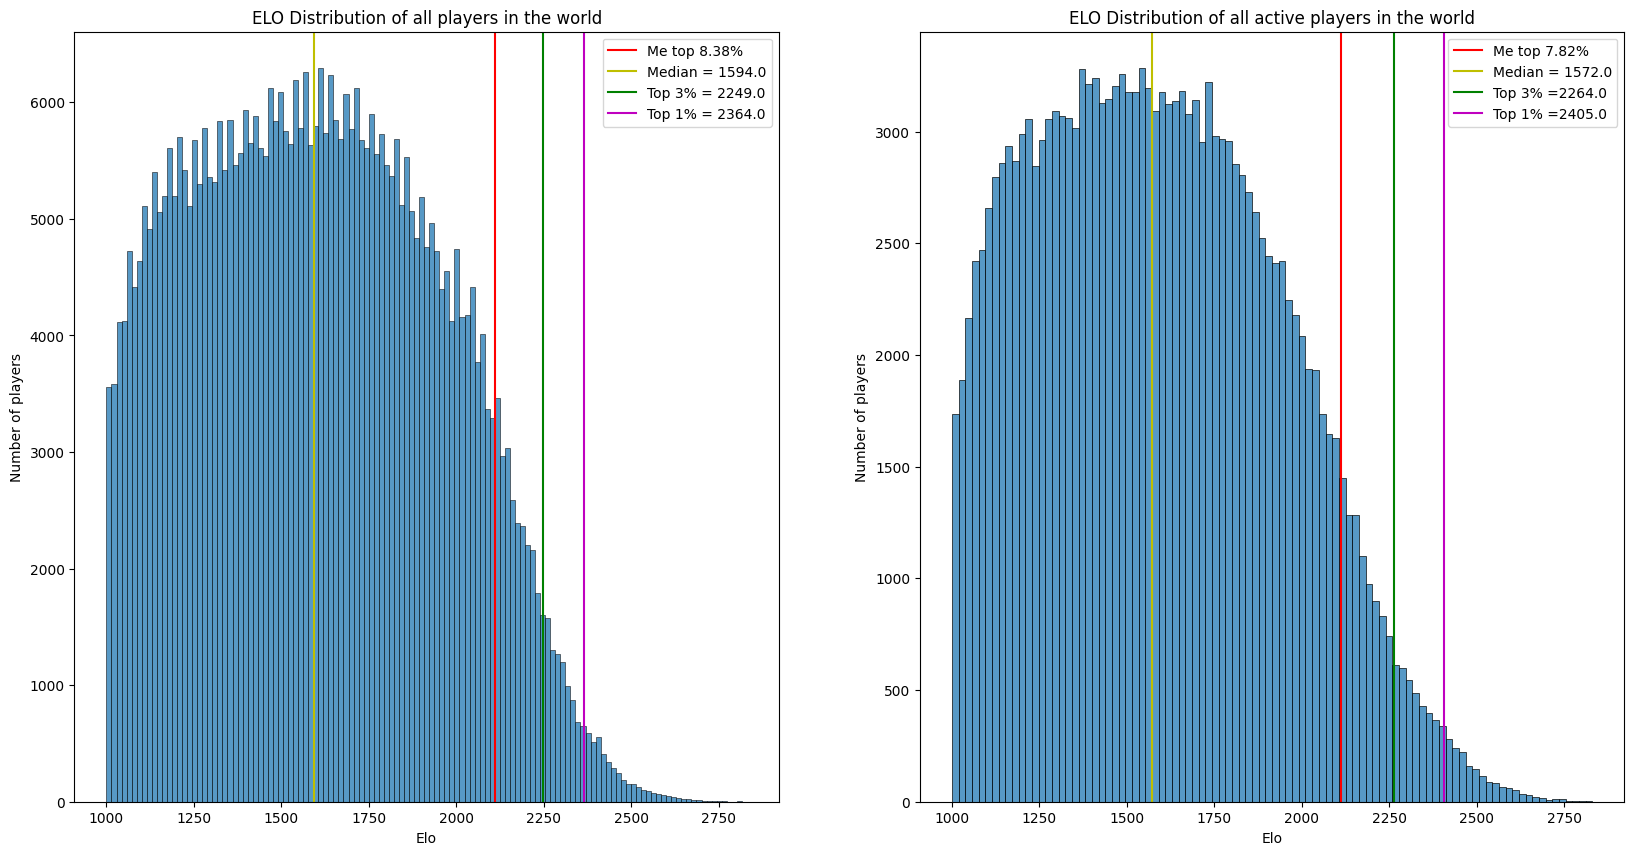

In [19]:
 plot_distribution(FIDE,FIDE_active,'the world')

It is interesting to notice that -as opposed to the median-, the top 3 and 1% have a higher value for the active players, this can be explained by the fact that strong players tend to be more active than intermediate level players.

My rating being 2110 FIDE at the time being, I am in the top 8% of all active chess players.

As a french player, I will check the same stats for France.

In [23]:
print(FIDE[FIDE.Country=='France'].Elo.describe())
FIDE_active[FIDE_active.Country=='France'].Elo.describe()

count    29581.000000
mean      1533.988743
std        315.094099
min       1001.000000
25%       1282.000000
50%       1501.000000
75%       1759.000000
max       2759.000000
Name: Elo, dtype: float64


count    14483.000000
mean      1526.515294
std        316.234772
min       1001.000000
25%       1280.000000
50%       1481.000000
75%       1743.500000
max       2759.000000
Name: Elo, dtype: float64

France has 28824 competitive players, but less than half of them are active. The mean rating is 1533 and 1526 for active players which is 70 points less than for the world.

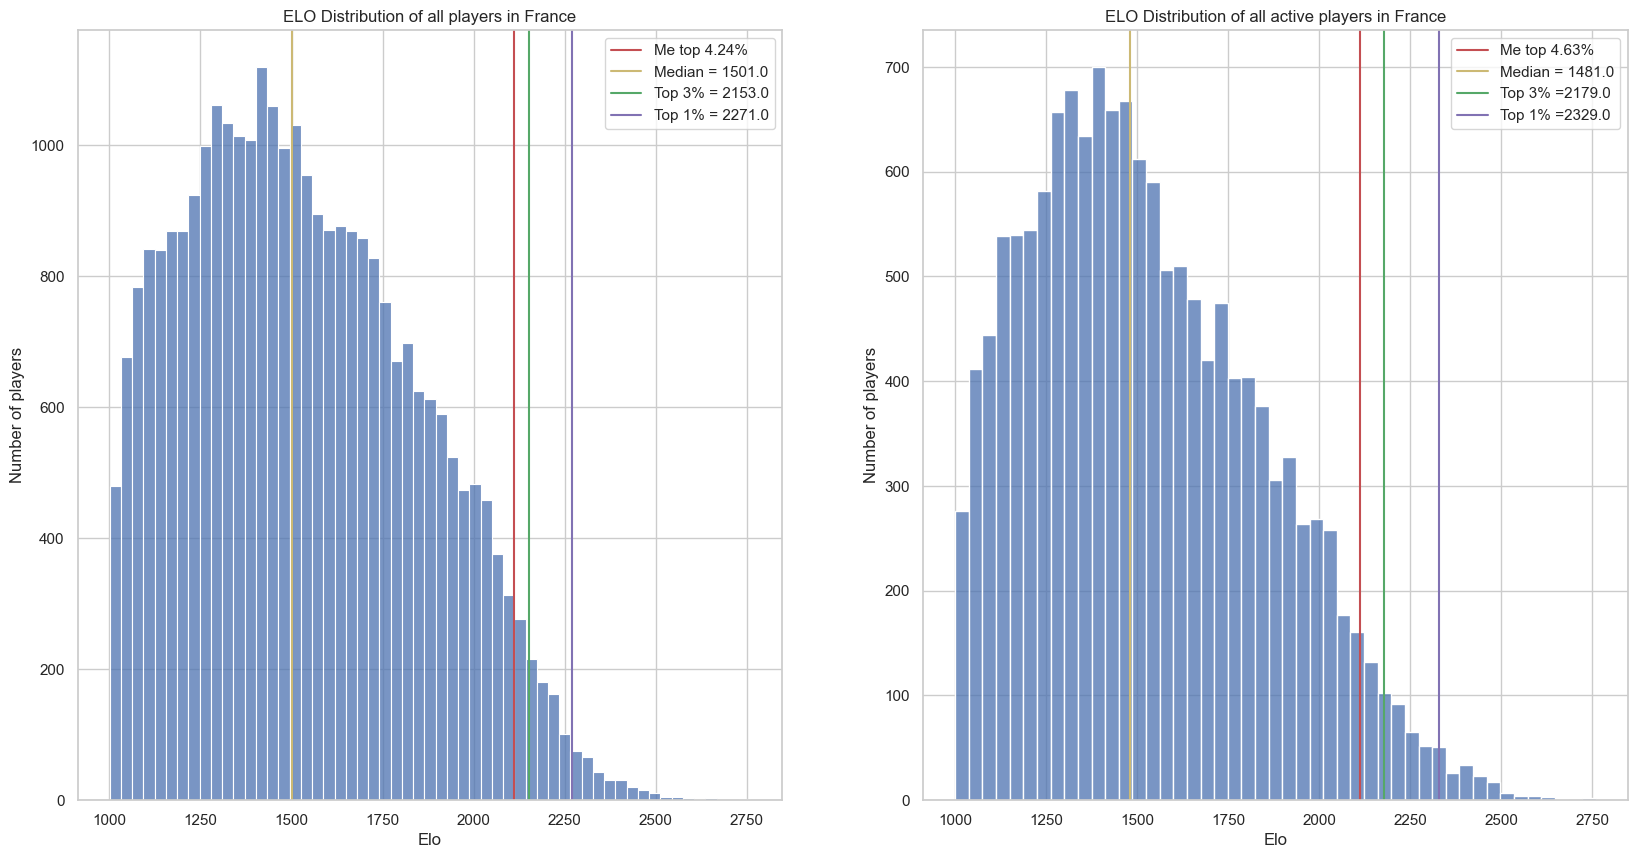

In [158]:
plot_distribution(FIDE[FIDE.Country=='France'],FIDE_active[FIDE_active.Country=='France'], 'France')

We notice the same trend that top 3 and 1% of active players have a higher value than top 3 and 1% of all players.

I am in the top 4% of french players !


## Chess titles

The titles can be earned at a certain rating :
    
    - GM : the almighty title, the title every chess player dream of. It is achieved with a rating of 2500 and 3 norms. A norm is a good performance in an international tournament.
    - IM : 2400 and 3 norms
    - FM : 2300
    - CM : 2200
 
 These 4 titles can be achieved by a man or a woman. But there are 4 titles only for women (WGM, WIM, WFM and WCM) that can be achieved the same way with 200 points less than their counterpart (2300 for WGM, 2200 for WIM, etc...)

It should be noted that these titles (except the GM one) can also be achieved by winning some continental events or by achieving a good performance at the olympiads. This is why many players have ratings such as CM, WCM, WFM but are low rated. 

In [25]:
FIDE.Title.unique()

array([None, 'WFM', 'IM', 'GM', 'WIM', 'FM', 'CM', 'WCM', 'WGM', 'WH '],
      dtype=object)

In [20]:
FIDE[FIDE.Title=='WH ']

,Name,Sex,Elo,IsActive,Title,Country,age
420330,"Vreeken, Corry",F,2080,No,WH,Netherlands,95.0


I have never seen the *WH* title before. According to wikipedia, Corry Vreeken has been awarded the woman grandmaster (WGM) honorary title. I don't know what this really means, but for the sake of clarity, I'll replace this title with the *WGM* title.

In [55]:
FIDE['Title'] = FIDE['Title'].replace({'WH ' : 'WGM'})

In [56]:
titles = ['GM', 'IM', 'FM', 'CM', 'WGM', 'WIM', 'WFM', 'WCM']
Titled = FIDE[FIDE['Title'].isin(titles) ]
Titled_active = FIDE_active[FIDE_active['Title'].isin(titles) ]


We will now try to find some outliers among the titled players such as, for example, the lowest rated titled players or the highest untitled players.

In [29]:
print(Titled.describe())
Titled_active.describe()

                Elo           age
count  21062.000000  20941.000000
mean    2200.021983     43.438470
std      217.188773     17.728344
min     1015.000000      8.000000
25%     2102.000000     29.000000
50%     2237.000000     42.000000
75%     2335.000000     57.000000
max     2830.000000    102.000000


,Elo,age
count,11302.000000,11288.000000
mean,2207.540524,39.692771
std,217.696312,17.154034
min,1038.000000,8.000000
25%,2100.250000,25.000000
50%,2236.000000,37.000000
75%,2346.000000,54.000000
max,2830.000000,92.000000


Around half of the titled players are inactive. The mean rating and the median are approximatively the same for all titled players and for active titled players.

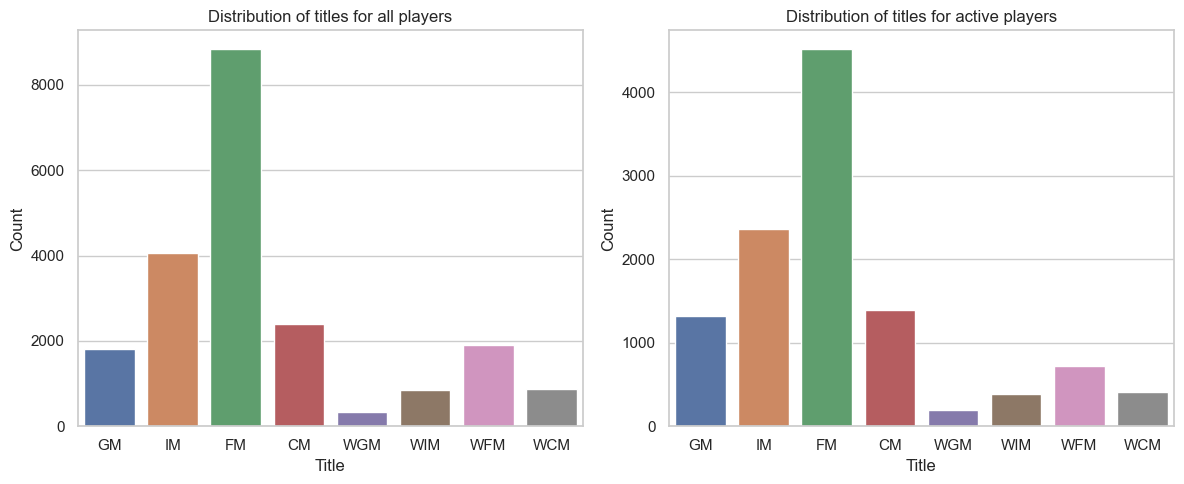

In [51]:
titles = ['GM', 'IM', 'FM', 'CM', 'WGM', 'WIM', 'WFM', 'WCM']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Title', data=FIDE, order=titles)
plt.title('Distribution of titles for all players')
plt.xlabel('Title')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Title', data=FIDE_active, order=titles)
plt.title('Distribution of titles for active players')
plt.xlabel('Title')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

FM (FIDE Master) is by far the most common chess title.

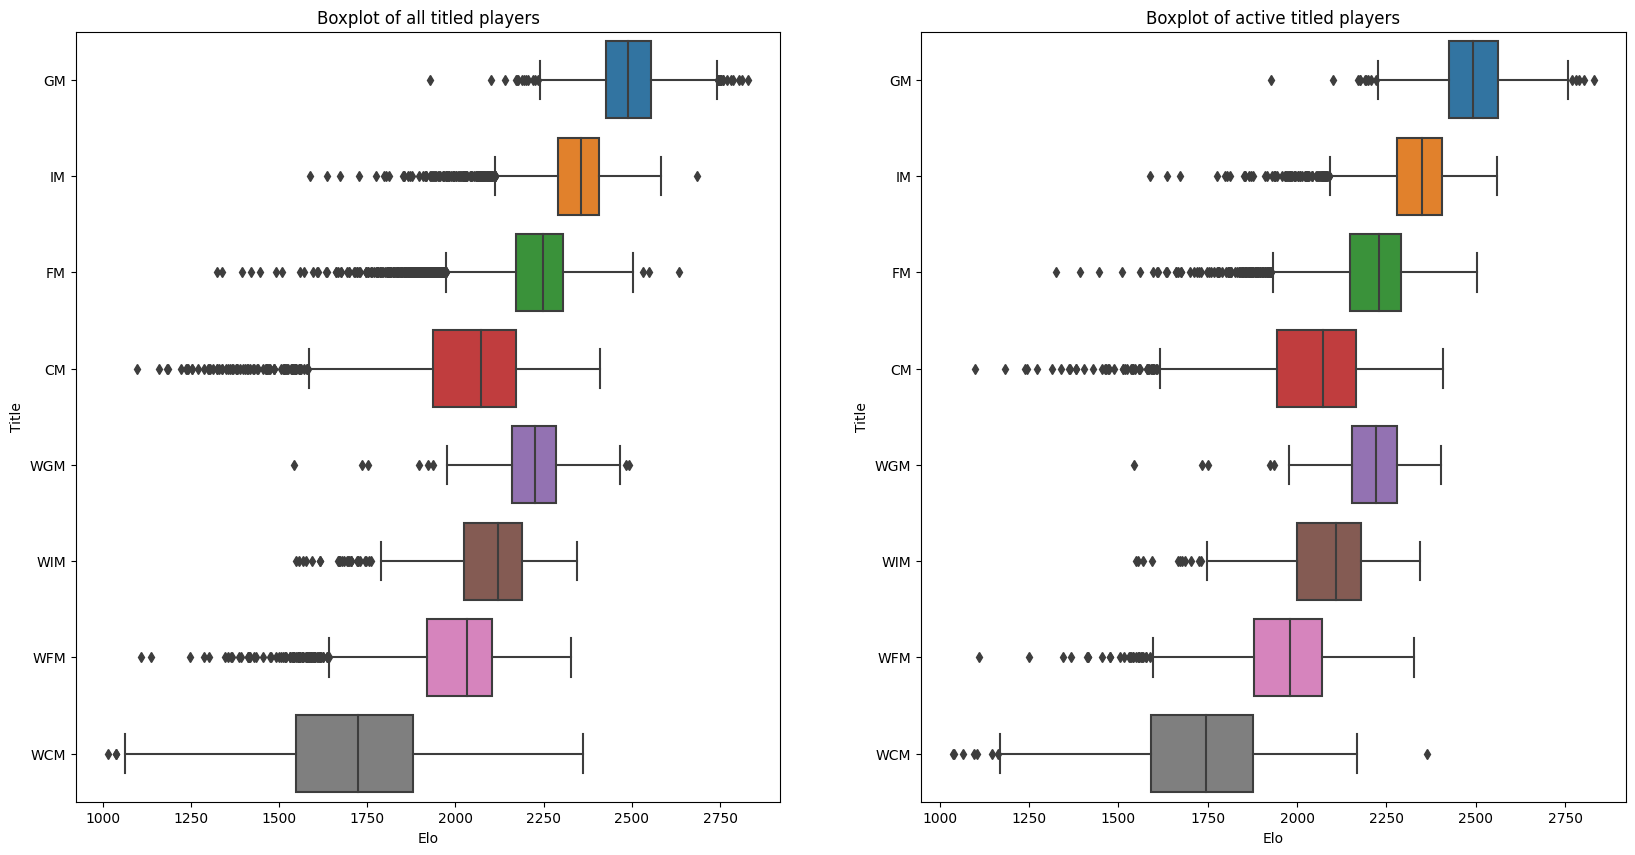

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(data=Titled, x="Elo", y="Title", order = ['GM', 'IM', 'FM', 'CM', 'WGM', 'WIM', 'WFM', 'WCM'], ax=ax1)
ax1.set_title("Boxplot of all titled players")

sns.boxplot(data=Titled_active, x="Elo", y="Title", order = ['GM', 'IM', 'FM', 'CM', 'WGM', 'WIM', 'WFM', 'WCM'],ax=ax2)
ax2.set_title("Boxplot of active titled players")
plt.show()

We can notice that the outliers for the FM/CM/WFM/WCM titles are due to players earning it by winning some kind of special events and not by rating. We also notice that the median for the WCM title is actually around 1700 which is far less that the 2000 elo required to earn it by rating.

In [42]:
Titled.nsmallest(10,'Elo')

,Name,Sex,Elo,IsActive,Title,Country,age
237149,Maral Bat-Ulzii,F,1015,No,WCM,Mongolia,13.0
235957,Manikonda Naga Sai Hasitha,F,1038,Yes,WCM,Botswana,13.0
359430,"Shah, Janvi Nipul",F,1039,Yes,WCM,Kenya,13.0
97133,"Dlamini, Nosipho",F,1064,Yes,WCM,Swaziland,27.0
357870,"Serikbay, Amina",F,1064,No,WCM,Kazakhstan,14.0
185837,"Kati, Imene",F,1078,No,WCM,Algeria,16.0
359419,"Shah, Devashri",F,1097,Yes,WCM,Kenya,15.0
301092,"Peter, Noah",M,1098,Yes,CM,South Africa,14.0
359429,"Shah, Janki Nipul",F,1105,Yes,WCM,Kenya,13.0
110023,"Essam, Soad",F,1107,No,WCM,Egypt,18.0


As I said, these are young players who earned their title in an uncommon way (for example winning the under 10 years old african championship), even though their ratings are below 1100.

### Grandmaster 

Who is the highest rated chess player ? Who is the lowest rated GM ? Let's find out

In [43]:
FIDE.nlargest(10,'Elo')

,Name,Sex,Elo,IsActive,Title,Country,age
64516,"Carlsen, Magnus",M,2830,Yes,GM,Norway,33.0
185480,"Kasparov, Garry",M,2812,No,GM,Russia,60.0
65375,"Caruana, Fabiano",M,2804,Yes,GM,United States of America,31.0
270400,"Nakamura, Hikaru",M,2788,Yes,GM,United States of America,36.0
96070,"Ding, Liren",M,2780,Yes,GM,China,31.0
274288,"Nepomniachtchi, Ian",M,2769,Yes,GM,Russia,33.0
117662,"Firouzja, Alireza",M,2759,Yes,GM,France,20.0
371714,"So, Wesley",M,2757,Yes,GM,United States of America,30.0
203064,"Kramnik, Vladimir",M,2753,No,GM,Russia,48.0
98530,"Dominguez Perez, Leinier",M,2752,Yes,GM,United States of America,40.0


Magnus Carlsen has been number one for more than a decade, Kasparov is still number 2 despite having retired 20 years ago.

In [44]:
FIDE[FIDE.Title=='GM'].nsmallest(10,'Elo')

,Name,Sex,Elo,IsActive,Title,Country,age
382222,"Suba, Mihai",M,1927,Yes,GM,Spain,76.0
437876,"Ziatdinov, Raset",M,2100,Yes,GM,United States of America,65.0
376184,"Spiridonov, Nikola",M,2141,No,GM,Bulgaria,85.0
200538,"Kostic, Vladimir G",M,2171,Yes,GM,Serbia,70.0
314967,"Pushkov, Nikolai",M,2175,Yes,GM,Russia,77.0
420766,"Vul, Arkadi Eremeevich",M,2176,Yes,GM,Russia,70.0
427457,"Wong, Meng Kong",M,2189,Yes,GM,Singapore,60.0
308626,"Popchev, Milko",M,2193,Yes,GM,Bulgaria,59.0
186140,"Kaufman, Lawrence",M,2199,Yes,GM,United States of America,76.0
119255,"Fominyh, Alexander",M,2206,Yes,GM,Russia,64.0


There are 9 old GM's rated below 2200, meaning they lost more than 300 points since they achieved their GM title. Mihai Suba from Spain is the only one below 2000 elo.

### International master 

Who is the highest rated IM ? And the lowest ? Let's find out

In [45]:
print(FIDE[FIDE.Title == 'IM' ].nlargest(5,'Elo'))

FIDE[FIDE.Title == 'IM' ].nsmallest(5,'Elo')

                    Name Sex   Elo IsActive Title  Country   age
323053     Rausis, Igors   M  2685       No    IM     FIDE  62.0
431412          Yin, Hao   M  2583       No    IM    China  44.0
146488       Gurel, Ediz   M  2560      Yes    IM   Turkey  15.0
15412        Amar, Elham   M  2555      Yes    IM   Norway  18.0
161231  Horvath, Dominik   M  2555      Yes    IM  Austria  20.0


,Name,Sex,Elo,IsActive,Title,Country,age
280964,"Nukin, Tolegen",M,1588,Yes,IM,Kazakhstan,75.0
88888,"De Winter Gallegos, Willy",M,1636,Yes,IM,Mexico,90.0
423225,"Wazeer Ahmad, Khan",M,1673,Yes,IM,India,76.0
106162,"Elfert, Aleksandr V.",M,1728,No,IM,Russia,78.0
179044,Kacem Rian,M,1775,Yes,IM,Morocco,64.0


Igors Rausis is actually a GM who has been caught cheating and has seen his GM title removed because of that. So, Hao Yin is the highest rated IM in the world with a rating of 2583 even though he hasn't played a single game for more than 20 years. While Ediz Gurel (young prodigy from Turkey) is the highest active IM.

Tolegen Nukin, 75 years old, is the lowest rated IM with a rating of 1588.

### FIDE master 

In [46]:
print(FIDE[FIDE.Title == 'FM' ].nsmallest(5,'Elo'))
FIDE[FIDE.Title == 'FM' ].nlargest(5,'Elo')



                         Name Sex   Elo IsActive Title       Country   age
392823  Teymouri, Abbas Gholi   M  1325      Yes    FM          Iran  75.0
233495         Malan, Jacques   M  1338       No    FM  South Africa  20.0
257628   Mohammadian,Mohammad   M  1394      Yes    FM          Iran  74.0
410045       Varden, Trevelyn   M  1421       No    FM  South Africa  21.0
231188           Magyar, Otto   M  1446      Yes    FM       Hungary  64.0


,Name,Sex,Elo,IsActive,Title,Country,age
5498,"Afromeev, Vladimir",M,2633,No,FM,Russia,69.0
273250,"Nechepurenko, Roman V.",M,2548,No,FM,Russia,35.0
202366,"Kozhakin, Vladimir",M,2533,No,FM,Russia,66.0
430738,"Yeletsky, Ivan",M,2504,Yes,FM,Russia,24.0
99914,"Dozorets, Anatoly",M,2495,No,FM,United States of America,66.0


Vladimir Afromeev is also a known cheater who achieved his 2633 rating thanks to fake tournaments. Ivan Yeletsky is the highest active FM in the world with a rating above 2500.

We can notice that all FM's rated above 2500 are russian, this is explained because in order to get the GM title you need norms that can be achieved by playing international events abroad and Russia being such a big country many players don't have the opportunity to play such events even though they play at GM-level.

Abbas Gholi Teymouri 75 years old from Iran is the lowest rated FM, even though he didn't get his IM title by rating but by winning some continental event. There is also the mysterious case of Otto Magyar 64 years old from Hungary who used to be 2400 but is now 1400, he also lost 500 points in the last year.

### Untitled

Who are the best untitled players ? Let's find out

In [21]:
FIDE[FIDE.Title.isna() ].nlargest(5,'Elo')

,Name,Sex,Elo,IsActive,Title,Country,age
385437,"Sviridov, Valery",M,2520,Yes,None,Russia,32.0
131193,"German, Gustavo",M,2515,No,None,Argentina,45.0
162752,"Huang, Renjie",M,2513,Yes,None,China,19.0
70881,"Chebotarev, Oleg",M,2512,No,None,Russia,38.0
144698,"Guerrero, Gilbert",M,2500,No,None,United States of America,NaN


The highest rated untitled player is Valery Sviridov with a rating of 2526. Some players especially young ones don't want to pay for FM or IM title and prefer to wait to get the GM title.



## Women in chess
Let's check some statistics related to women in chess.

In [22]:
FIDE[FIDE.Sex=='F'].nlargest(10,'Elo')

,Name,Sex,Elo,IsActive,Title,Country,age
307455,"Polgar, Judit",F,2675,No,GM,Hungary,47.0
161729,"Hou, Yifan",F,2632,Yes,GM,China,29.0
307458,"Polgar, Susan",F,2577,No,GM,Hungary,54.0
428422,"Xie, Jun",F,2574,No,GM,China,53.0
198184,"Koneru, Humpy",F,2554,Yes,GM,India,36.0
139938,"Goryachkina, Aleksandra",F,2553,Yes,GM,FIDE,25.0
217295,"Lei, Tingjie",F,2550,Yes,GM,China,26.0
177660,"Ju, Wenjun",F,2549,Yes,GM,China,32.0
211130,"Lagno, Kateryna",F,2542,Yes,GM,Russia,34.0
76408,"Cmilyte, Viktorija",F,2538,No,GM,Lithuania,40.0


The famous Polgar sisters are now retired. Hou Yifan is the highest woman still active.

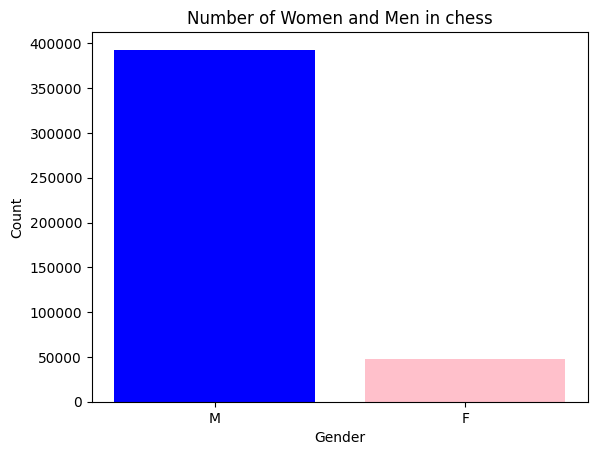

In [23]:
plt.bar(FIDE['Sex'].value_counts().index, FIDE['Sex'].value_counts().values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Women and Men in chess')
plt.show()

In [24]:
print((len(FIDE[FIDE.Sex=='F'])/len(FIDE))*100," % of all chess players in the world are women") 
print((len(FIDE_active[FIDE_active.Sex=='F'])/len(FIDE_active))*100," % of active chess players in the world are women") 
print(len(FIDE[(FIDE['Country'] =='France') & (FIDE['Sex'] =='F')])/len(FIDE[FIDE.Country=='France'])*100," % of chess players in France are women")
print(len(FIDE_active[(FIDE_active['Country'] =='France') & (FIDE_active['Sex'] =='F')])/len(FIDE_active[FIDE_active.Country=='France'])*100," % of active chess players in France are women")
print("The mean rating for men is",FIDE.Elo.mean())
print("The mean rating for active men is",FIDE_active.Elo.mean())
print("The mean rating for women is",FIDE[FIDE.Sex=='F'].Elo.mean())
print("The mean rating for active women is",FIDE_active[FIDE_active.Sex=='F'].Elo.mean())
print("There are ",len(FIDE[FIDE.Sex=='F'][FIDE[FIDE.Sex=='F'].Title=='GM']),"GMs that are women")
print(len(FIDE[FIDE.Sex=='F'][FIDE[FIDE.Sex=='F'].Title=='GM']) / len(FIDE[FIDE.Title == 'GM']) * 100, "% of GMs are women")

10.770932062335799  % of all chess players in the world are women
10.010318142734308  % of active chess players in the world are women
8.603495486967986  % of chess players in France are women
7.46392322032728  % of active chess players in France are women
The mean rating for men is 1606.1832016694332
The mean rating for active men is 1593.393551160791
The mean rating for women is 1461.3557996373909
The mean rating for active women is 1418.9595144018783
There are  41 GMs that are women
2.2577092511013213 % of GMs are women


Around 10% percent of players are women, also the mean rating of women is around 150 lower than men, maybe this can be explained because they are far less numerous ? Although this hypothesis would need more analysis (that I will not do) to be verified. The gender gap in chess is still a very controversial topic in the chess world.

What I can do is check which countries have the highest and the lowest percentage of female players.

In [25]:
WOMEN = FIDE[FIDE.Sex=='F']
countries = WOMEN.Country.unique()
women_perc = []
nb_women = []

for country in countries:
    nb_women+=[len(WOMEN[WOMEN.Country==country])]
    women_perc +=[len(WOMEN[WOMEN.Country==country])/len(FIDE[FIDE.Country == country])*100]

    
stats_women= pd.DataFrame(data = {'nb_women' : nb_women,
                                  'perc_women' : women_perc}, index = countries)
    

Some countries have very small sample size so it would be better to filter with countries with a number of women > 50

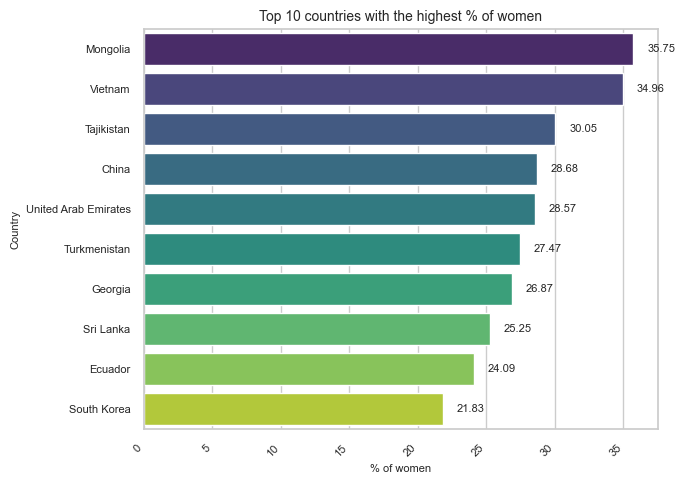

In [68]:
top_countries = stats_women[stats_women.nb_women>50].perc_women.nlargest(10)

create_barplot(top_countries,'% of women','Country','Top 10 countries with the highest % of women',2)

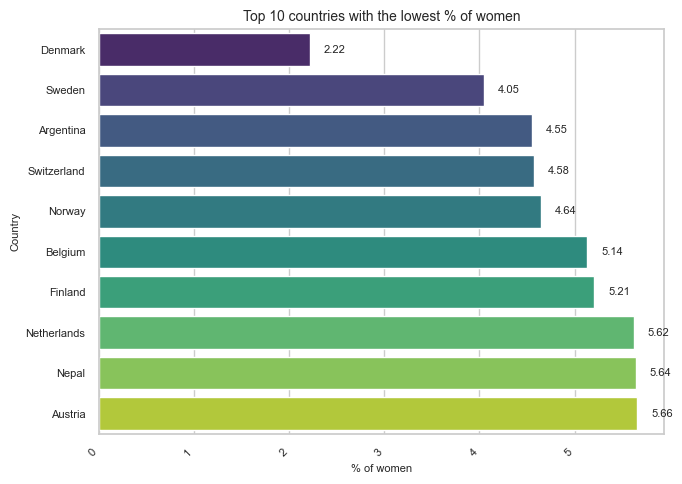

In [69]:
top_countries = stats_women[stats_women.nb_women>50].perc_women.nsmallest(10)

create_barplot(top_countries,'% of women','Country','Top 10 countries with the lowest % of women',2)

Ok the patterns here are very interesting. Asian countries such as Mongolia, Vietnam of China have the highest % of female players with around 30-35%. At the contrary northern european countries such as Denmark or Sweden have the lowest percentage with 2 to 5%. 

This is an interesting example of the [Gender-equality paradox](https://en.wikipedia.org/wiki/Gender-equality_paradox). The gender equality paradox refers to a phenomenon observed in some Scandinavian countries where, despite significant efforts to promote gender equality and eliminate gender-based stereotypes, there is a notable persistence of occupational segregation between men and women in certain fields.

## Age

In [65]:
FIDE[FIDE.age>102]

,Name,Sex,Elo,IsActive,Title,Country,age
63839,"Carames, Luis",M,2040,No,None,Argentina,103.0
76623,"Codina Espinasa, Joan",M,1491,Yes,None,Spain,103.0
91516,"Demoulin, Paul",M,1711,No,None,Belgium,104.0
98949,"Donnelly, Ruth",F,2030,No,None,United States of America,103.0
132004,"Ghasemi, Hengameh",F,1604,No,None,Iran,122.0
163318,"Huguet, Marcel",M,1250,No,None,France,103.0
188366,"Kesari, Dammitha",M,1109,No,None,Sri Lanka,103.0
192533,"Kinin, Igor",M,2013,No,None,Russia,103.0
195767,"Koch, Horst",M,1745,No,None,Germany,103.0
203067,"Kramorev, Yuri",M,1959,No,None,Russia,103.0


According to this dataset, the oldest player is Nyoni Gabriel Sibusiso who was born in 1900, but I think this is a mistake.
I also think the case of Mardig Tachijian, 103 yo and still active is a mistake.

According to FIDE, the oldest active player is actually Joan Codina Espinasa from Spain, who is 103 years old with a rating of 1491. I hope I will be as strong as him by the age of 100 :).

### Age distribution

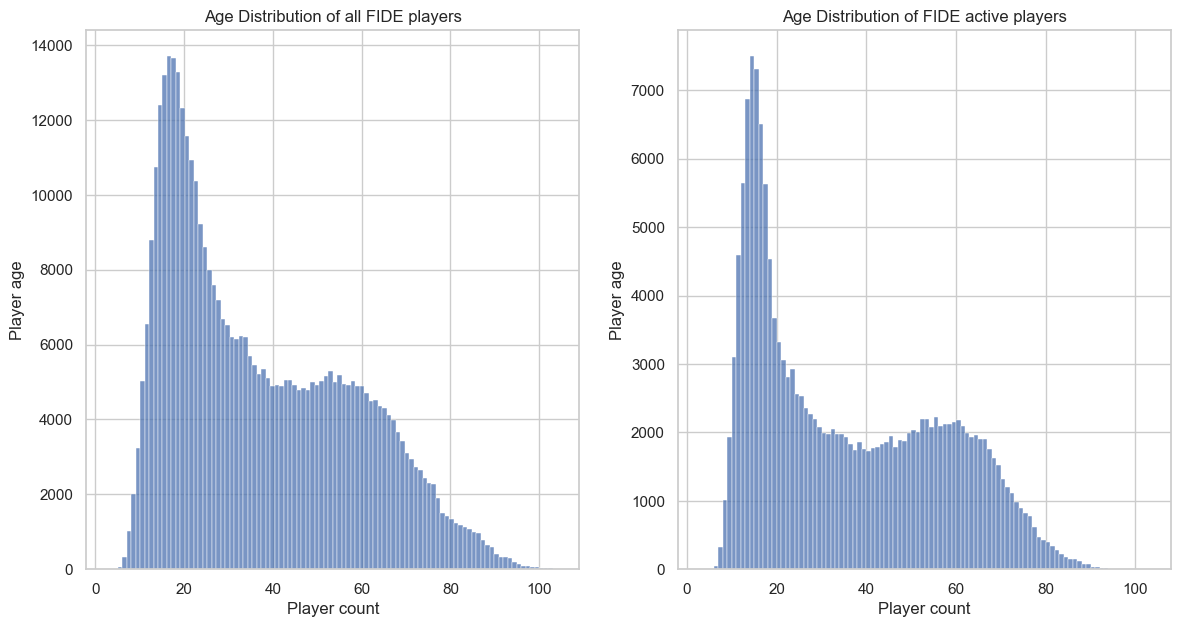

In [29]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.histplot(data=FIDE[FIDE.age<120], x='age',bins=100)
plt.xlabel('Player count')
plt.ylabel('Player age')
plt.title('Age Distribution of all FIDE players')

plt.subplot(1,2,2)
sns.histplot(data=FIDE_active[FIDE_active.age<120], x='age',bins=100)
plt.xlabel('Player count')
plt.ylabel('Player age')
plt.title('Age Distribution of FIDE active players')
plt.show()

We see a big peak of players under 20 years old, then after 20 years old, the graph decreases because people focus more on their studies and careers than on chess. We also notice a slight increase from the age of 50, because people start to retire and find more time for chess.

It would be interesting to know at what age chess players are supposed to peak. To answer this question, I will plot the average rating by age.

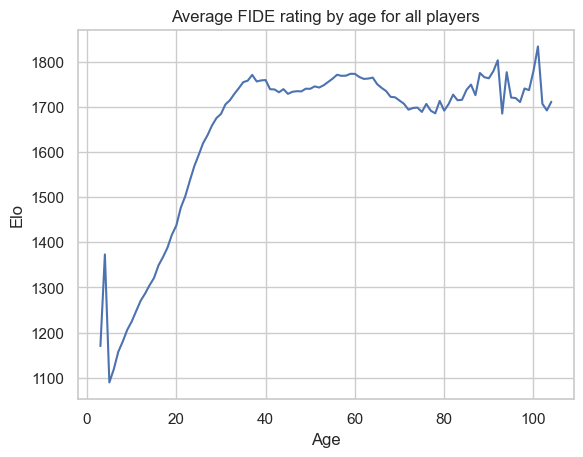

In [32]:
FIDE_mean_by_Age = FIDE[FIDE.age<120].groupby('age').Elo.mean().reset_index()

plt.plot(FIDE_mean_by_Age.age, FIDE_mean_by_Age.Elo)
plt.title('Average FIDE rating by age for all players')
plt.ylabel('Elo')
plt.xlabel('Age')
plt.show()

This graphic might be biased with old players that haven't played a game in decades. So let's plot the same graphic for only active plyers.

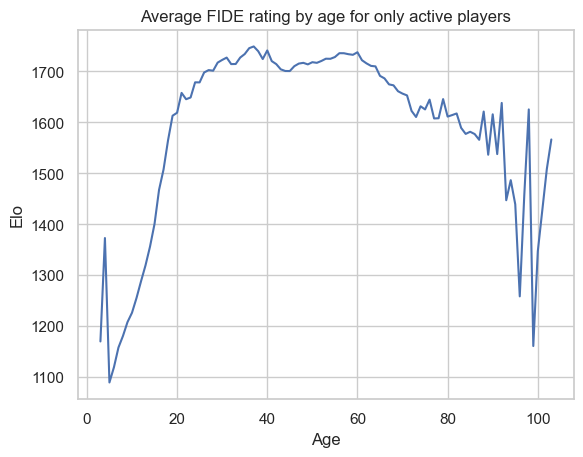

In [31]:
FIDE_active_mean_by_Age = FIDE_active[FIDE_active.age<120].groupby('age').Elo.mean().reset_index()

plt.plot(FIDE_active_mean_by_Age.age, FIDE_active_mean_by_Age.Elo)
plt.title('Average FIDE rating by age for only active players')
plt.ylabel('Elo')
plt.xlabel('Age')
plt.show()

The line chart shows a steep increase in FIDE up to 37, then a small decline between 37 and 45 and then again a small increase between 46 and 60 and finally a gradual decline as players get older. Note that we do see sharp declines and inclines for players with age > 90, this is due to high variance since there are very few players for each age beyond 90.

### Teenagers in chess
Which countries have the highest and lowest % of teenagers ? Let's find out

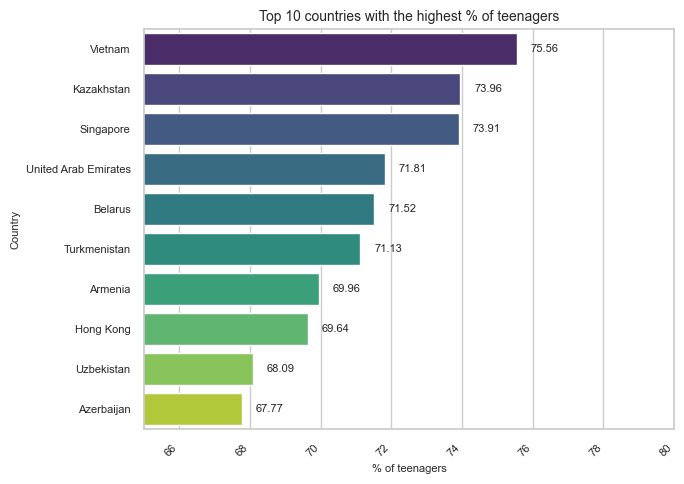

In [70]:
teenagers_df = FIDE_active[FIDE_active.age<20]
total_players = FIDE_active.groupby('Country').size()
filtered_countries = total_players[total_players >= 100]
teenagers_df_filtered = teenagers_df[teenagers_df.Country.isin (filtered_countries.index)]
teenagers_percentage = teenagers_df_filtered.groupby('Country').size() / total_players * 100
top_10_countries = teenagers_percentage.sort_values(ascending=False).head(10)

create_barplot(top_10_countries,'% of teenagers', 'Country', 'Top 10 countries with the highest % of teenagers',2,xlim=(65,80))

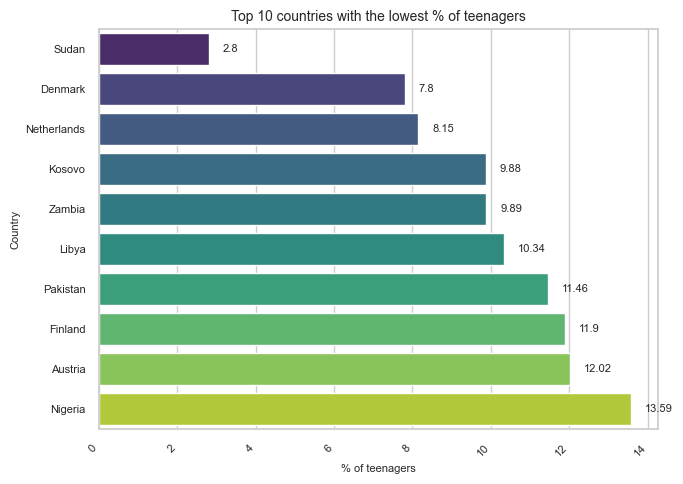

In [71]:
top_10_countries = teenagers_percentage.sort_values(ascending=True).head(10)

create_barplot(top_10_countries,'% of teenagers', 'Country', 'Top 10 countries with the lowest % of teenagers',2)

Interestingly, asian and ex-USSR countries have the highest percentage of teenagers with more than 70%. Those are countries with a strong chess culture where chess is integrated into their educational curricula, and where government's support can play a significant role.

At the contrary, some european (The Nederlands, Denmark, ...) and african countries have the lowest percentage of teenagers (10%).

This explains the high % of female in asian countries and the low % of female in Scandinavia that we saw previously. 

A high percentage of teenagers can make players from a country relatively underrated compared to countries with a lower percentage of teenagers.

### Young prodigies

Let's try to find some young prodigies. Who knows, maybe on of them will be the next Magnus Carlsen ?

In [73]:
FIDE[FIDE.age<6]

,Name,Sex,Elo,IsActive,Title,Country,age
7505,"Ailan, Afnan Tajwar",M,1170,Yes,None,Bangladesh,3.0
110555,Evan Antonio Telles,M,1055,Yes,None,India,5.0
237831,Mardav Bhaikta,M,1124,Yes,None,India,5.0
259199,"Molina Toledo, Ryan",M,1373,Yes,None,Cuba,4.0


Incredible ! Afnan Tajwar Allan from Bangladesh already plays competitive chess at the age of 3 !

In [74]:
FIDE[FIDE.age<13][FIDE[FIDE.age<13].Elo>2300]

,Name,Sex,Elo,IsActive,Title,Country,age
6885,"Ahmad, Khagan",M,2318,Yes,FM,Azerbaijan,12.0
85652,Dau Khuong Duy,M,2309,Yes,CM,Vietnam,12.0
108115,"Erdogmus, Yagiz Kaan",M,2524,Yes,IM,Turkey,12.0
134940,"Gloeckler, Christian",M,2354,Yes,FM,Germany,12.0
248902,Mendes Aaron Reeve,M,2309,Yes,FM,Canada,11.0
286158,"Oro, Faustino",M,2357,Yes,FM,Argentina,10.0
353116,"Schnaider, Ilan",M,2323,Yes,FM,Argentina,12.0
402113,"Tulendinov, Dinmukhammed",M,2303,Yes,FM,Kazakhstan,12.0
411793,"Vaz, Ethan",M,2403,Yes,FM,India,12.0


In [75]:
FIDE[FIDE.age<11][FIDE[FIDE.age<11].Elo>2100]

,Name,Sex,Elo,IsActive,Title,Country,age
790,"Abbasi Abeluie, Mohammad Mehdi",M,2205,Yes,CM,Iran,10.0
194117,"Kleimenov, Nikolay",M,2101,Yes,None,FIDE,10.0
205856,"Kuandykuly, Danis",M,2121,Yes,None,Kazakhstan,10.0
286158,"Oro, Faustino",M,2357,Yes,FM,Argentina,10.0


You can see above a list of young prodigies. Faustino Oro from Argentina is famous for becoming the youngest player ever to achieve a rating of 2300 at the age of 9 years old. Yagiz Kaan Erdogmus from Turkey, is already above 2500 at the age of 12 and only needs norms to become a GM.

## Countries
Last but not least, we can now look at chess countries. Have you ever wondered which country is the strongest in chess ? or has the biggest chess culture ? The analysis below will answer your questions.
First, we can check which countries has the most chess players, the most titled players and the most GMs



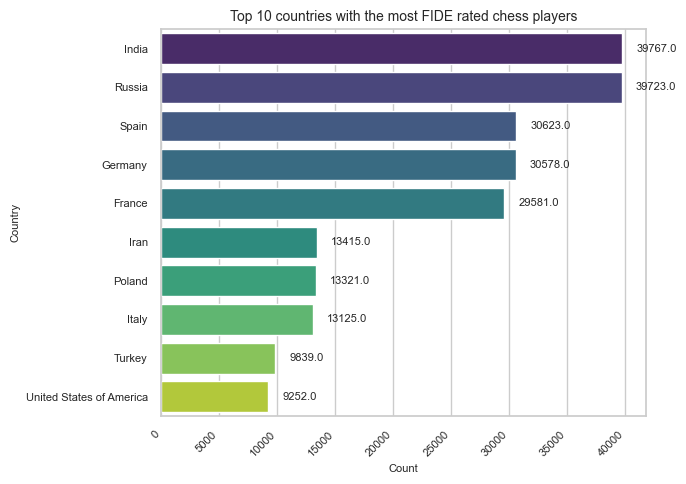

In [48]:
top_countries = FIDE['Country'].value_counts().head(10)

create_barplot(top_countries,'Count','Country','Top 10 countries with the most FIDE rated chess players')

India has just surpassed Russia with more than 39000 players. 

Also it should be noted that some countries have their own national rating such as USA for example, which means FIDE rated tournaments are very rare and so they get far less FIDE rated players.

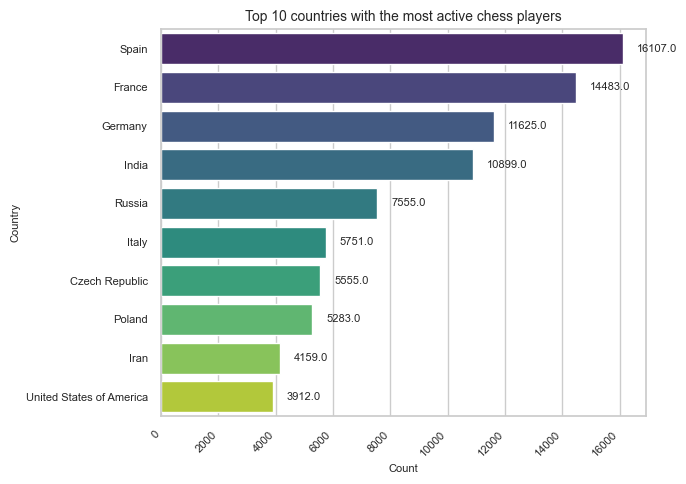

In [83]:
top_countries = FIDE_active['Country'].value_counts().head(10)

create_barplot(top_countries,'Count','Country', 'Top 10 countries with the most active chess players')

This is interesting; Russia, which is second in terms of the overall number of chess players, ranks only fifth when considering active chess players. This could be explained by the war with Ukraine that made a lot of russian players play for another countries. 

Also the fact that Spain and France are the 2 countries with the most active chess players can be explained because these 2 countries have a big amount of FIDE-rated chess tournaments so players have a lot of opportunities to stay active.

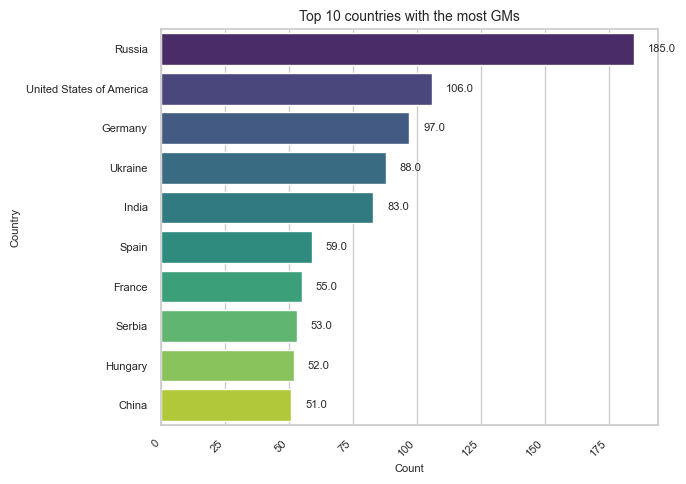

In [49]:
top_countries = FIDE[FIDE.Title=='GM']['Country'].value_counts().head(10)

create_barplot(top_countries,'Count','Country','Top 10 countries with the most GMs')


Russia has the most GMs with 185 followed by USA and Germany. 

It should be noted that many russian players are playing under the FIDE flag or for another countries, in order to participate in international events, because Russia was banned because of the war. So the number of russian GM's is actually above 200.

<Figure size 1200x600 with 0 Axes>

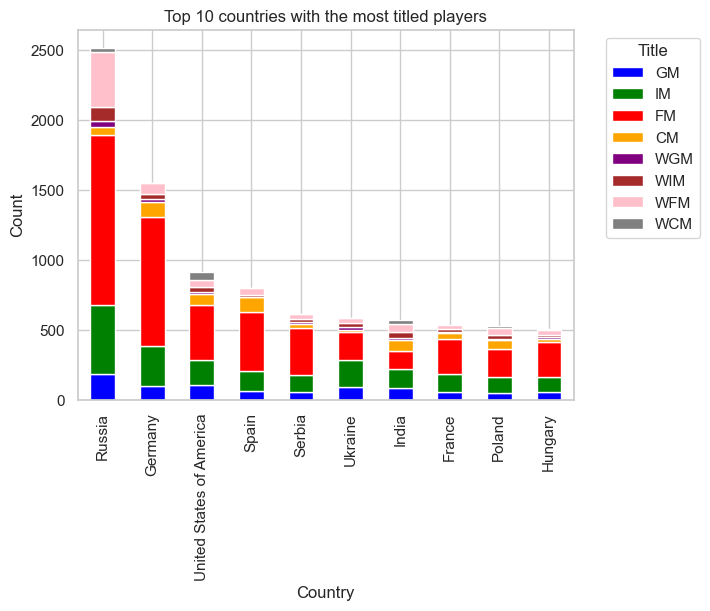

In [52]:
titles = ['GM', 'IM', 'FM', 'CM', 'WGM', 'WIM', 'WFM', 'WCM']

title_counts = FIDE.groupby(['Country', 'Title']).size().reset_index(name='count')

# Calculate the total number of titled players for each country
total_titled_players_by_country = title_counts.groupby('Country')['count'].sum().reset_index()

# Sort the DataFrame by the total number of titled players in descending order
top_countries = total_titled_players_by_country.sort_values(by='count', ascending=False).head(10)['Country']

# Filter to include only the top countries based on the number of titled players
title_counts_top10 = title_counts[title_counts['Country'].isin(top_countries)]

pivot_df = title_counts_top10.pivot(index='Country', columns='Title', values='count').fillna(0)
pivot_df = pivot_df[titles]

# Sort the DataFrame by the total count of titled players in descending order
pivot_df = pivot_df.loc[total_titled_players_by_country[total_titled_players_by_country['Country'].isin(top_countries)].sort_values(by='count', ascending=False)['Country']]

create_stackedbarplot(pivot_df,'Country','Count','Top 10 countries with the most titled players')

Russia is still first with 2517 titled players, followed by Germany and USA. The proportion of WFMs (pink) is way more important in Russia.


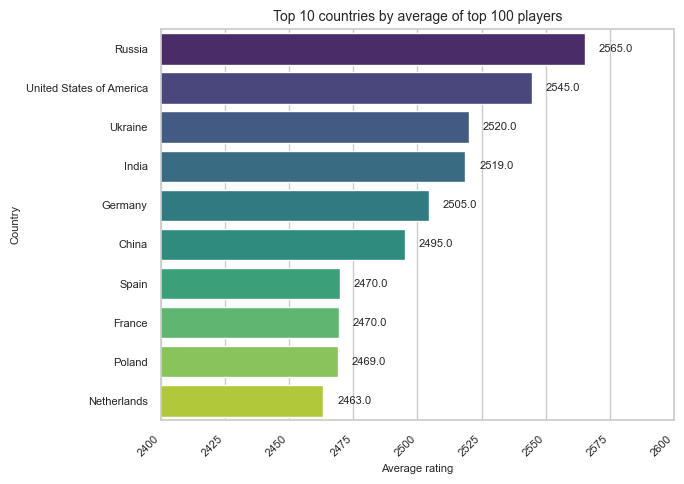

In [106]:
sorted_players = FIDE.sort_values(by='Elo', ascending=False).groupby('Country').head(100)

# Calculate the average rating for each country
average_rating_by_country = sorted_players.groupby('Country')['Elo'].mean().reset_index()
top_10_countries = average_rating_by_country.nlargest(10, 'Elo')
top_10_countries = top_10_countries.set_index('Country')

create_barplot(top_10_countries.squeeze(),'Average rating','Country','Top 10 countries by average of top 100 players',xlim=(2400,2600))

When we average the top 100 players for each country, Russia is the strongest country followed by USA, Ukraine and India. These countries are always at the top at the chess olympiads.

### % of titled players among all players and among the entire population

To conclude this analysis, we will check which countries have the most GM's / titled players compared to the total number of players and to the entire population and which countries have the highest and lowest mean elo rating.

To do so, I will create a dataframe of countries with statistics for each countries. This dataframe will contain the following columns :
- **nb_players** : the number of all FIDE rated players of the country
- **nb_active_players** : the number of all active FIDE rated players of the country
- **nb_GM** : the number of GMs of the country
- **nb_titled** : the number of titled players of the country
- **perc_GM_vs_players** : the percentage of GMs among all the players of the country
- **perc_titled_vs_players** : the percentage of titled players among all the players of the country
- **mean_elo** : the mean elo of all FIDE rated players of the country
- **mean_elo_active** : the mean elo of all active FIDE rated players of the country

I will then filter out countries with less than 100 players in order to avoid countries with very small sample sizes.

In [57]:
countries = FIDE.Country.unique()
nb_players = []
nb_active_players=[]
nb_GM = []
nb_titled = []
perc_GM_vs_players = []
perc_titled_vs_players = []
mean_elo = []
mean_elo_active =[]

for country in countries:
    nb_players += [len(FIDE[FIDE.Country == country])]
    nb_active_players+=[len(FIDE_active[FIDE_active.Country==country])]
    nb = len (FIDE[(FIDE.Title == 'GM') & (FIDE.Country == country)])
    nb_GM += [nb]
    nb1 = len(Titled[Titled.Country == country])
    nb_titled += [nb1]
    mean_elo += [FIDE[FIDE.Country == country].Elo.mean()]
    mean_elo_active += [FIDE_active[FIDE_active.Country == country].Elo.mean()]
    perc_titled_vs_players += [nb1 / len(FIDE[FIDE.Country == country])*100]
    perc_GM_vs_players += [nb / len(FIDE[FIDE.Country == country])*100]

In [58]:
stats_countries = pd.DataFrame(data = {'number_players' : nb_players,
                                       'number_active_players' : nb_active_players,
                                       'number_GM' : nb_GM, 
                                       'number_titled' : nb_titled,
                                      '%GM_among_players' : perc_GM_vs_players,
                                      '%titled_among_players' : perc_titled_vs_players,
                                      'mean_elo_all_players' : mean_elo,
                                      'mean_elo_active_players' : mean_elo_active}, index = countries)

stats_countries = stats_countries[stats_countries.number_players>100]  #to avoid small sample sizes

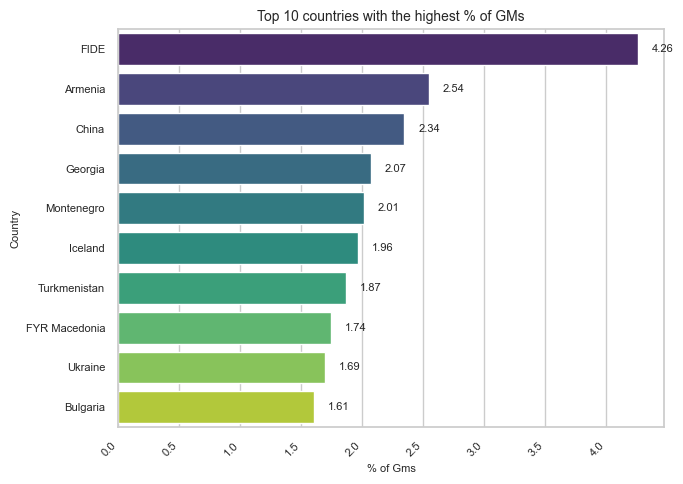

In [72]:
top_countries = stats_countries['%GM_among_players'].nlargest(10)

create_barplot(top_countries,'% of Gms','Country','Top 10 countries with the highest % of GMs',2)

*FIDE* represents only some russian players playing under the FIDE flag because of the war. 

So Armenia, China and Georgia are the top 3 countries with the highest number of GMs in relation to the total number of players with more than 2%. Armenia, being a former USSR country, has a big chess culture where chess is taught in school !

<Figure size 1200x600 with 0 Axes>

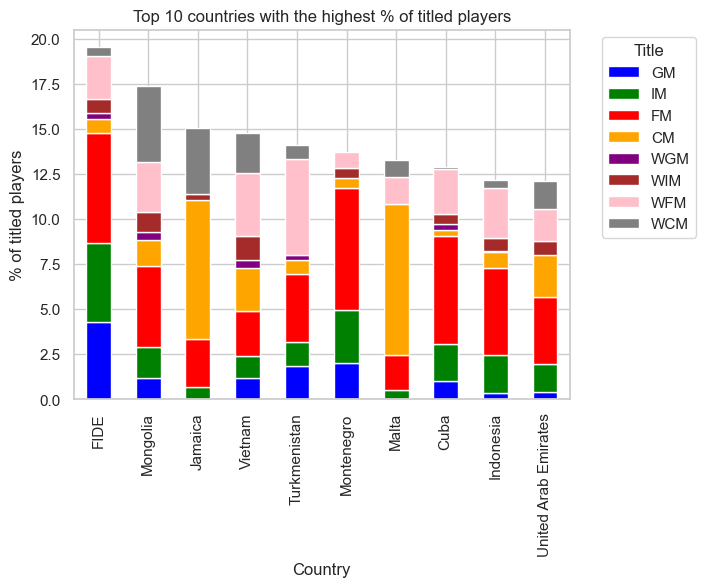

In [60]:


title_counts = FIDE.groupby(['Country', 'Title']).size().unstack(fill_value=0)
total_players = FIDE.groupby('Country').size()

# Calculate the percentage of players with each title for each country
percentage_by_title = (title_counts.div(total_players, axis=0) * 100).reset_index()

# Filter countries with more than 100 players
filtered_countries = total_players[total_players > 100].index

# Filter the data to include only the relevant countries
filtered_percentage = percentage_by_title[percentage_by_title['Country'].isin(filtered_countries)]

# Melt the DataFrame for Seaborn
melted_df = pd.melt(filtered_percentage, id_vars='Country', var_name='Title', value_name='Percentage')

# Pivot the DataFrame for Seaborn
pivot_df = melted_df.pivot(index='Country', columns='Title', values='Percentage')
pivot_df = pivot_df[titles]

# Select the top 10 countries
top_10_countries = melted_df.groupby('Country')['Percentage'].sum().nlargest(10).index

# Filter the data to include only the top countries
final_df = pivot_df.loc[top_10_countries]

create_stackedbarplot(final_df, 'Country', '% of titled players','Top 10 countries with the highest % of titled players')


When we filter out countries with very low sample sizes, Mongolia has the highest percentage of titled players with 17%, followed by Jamaica and Vietnam. Also it is interesting to notice that small countries such as Jamaica and Malta have a majority of CM's and no GM. This is because their players earned their titles in chess olympiads and not by rating.


Now it would be interesting to see the % of GM's and titled players in relation to the entire population of the country. To do so, I downloaded a [kaggle dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset) with the population of each country. 6 countries have another name, I will rename them. In the Kaggle dataset we have United Kingdom while in the FIDE dataset we have England, Scotland and Wales, I will merge these 3 into 1. Kosovo is not in the dataset, I will add its population manually.

In [61]:
stats_countries2=stats_countries[['number_GM','number_titled']]

countries_to_merge = ['England', 'Wales', 'Scotland']


merged_row = stats_countries2.loc[countries_to_merge].sum().to_frame().T
merged_row.index = ['United Kingdom']

stats_countries2 = stats_countries2.drop(index=countries_to_merge)
stats_countries2 = pd.concat([stats_countries2, merged_row])

In [62]:



pop = pd.read_csv('world_population.csv')

pop=pop[['Country/Territory','2022 Population']]
pop.columns=['Country','Population']
pop['Country'].replace({'United States' : 'United States of America', 'Bosnia and Herzegovina' : 'Bosnia & Herzegovina',\
                         'Trinidad and Tobago' : 'Trinidad & Tobago', 'North Macedonia' : 'FYR Macedonia', \
                         'Taiwan' : 'Chinese Taipei'},inplace=True)   #not the same name in the 2 datasets


pop.set_index('Country', inplace=True)


In [63]:
stats_countries2 = stats_countries2.join(pop, how='left')
stats_countries2.loc['Kosovo','Population']=1958773
#stats_countries2[stats_countries2['Population'].isna()]

In [64]:
stats_countries2['%GM_in_pop']=stats_countries2['number_GM']/stats_countries2['Population']*100
stats_countries2['%titled_in_pop']=stats_countries2['number_titled']/stats_countries2['Population']*100

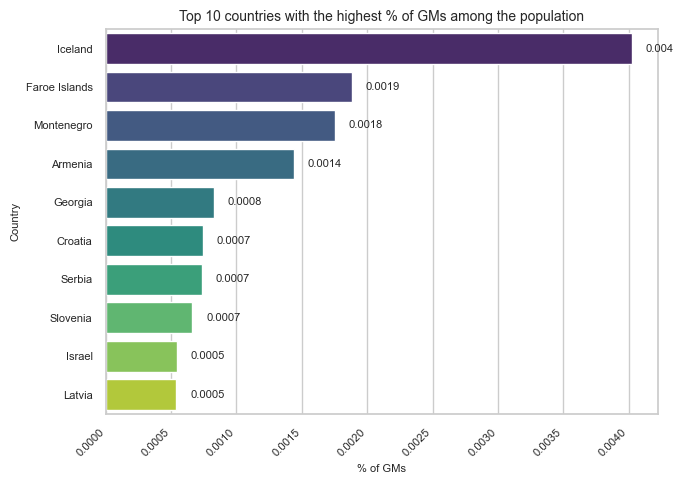

In [65]:
top_countries = stats_countries2['%GM_in_pop'].nlargest(10)

create_barplot(top_countries,'% of GMs', 'Country', 'Top 10 countries with the highest % of GMs among the population',4)

<Figure size 1200x600 with 0 Axes>

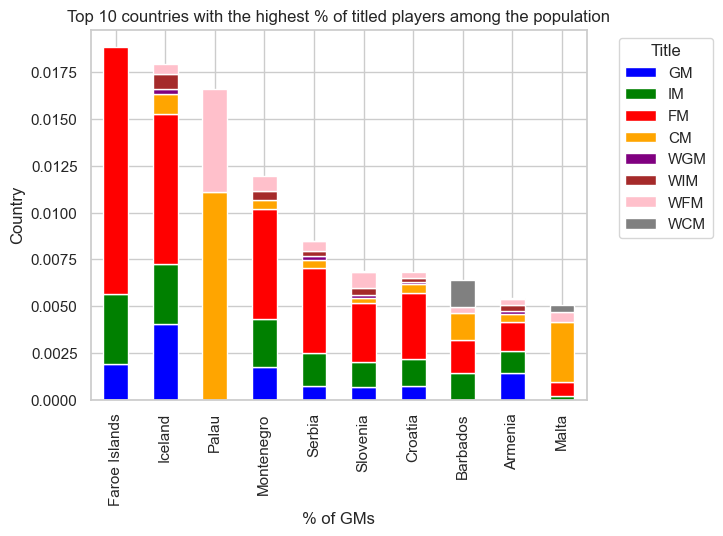

In [66]:


# Count the titles per country
title_counts = FIDE.groupby(['Country', 'Title']).size().unstack(fill_value=0)

# Count the total players per country
total_players = FIDE.groupby('Country').size()

# Calculate the percentage of players with each title for each country
percentage_by_title = (title_counts.div(stats_countries2['Population'], axis=0) * 100).reset_index()

# Filter countries with more than 100 players
filtered_countries = total_players[total_players > 100].index

# Filter the data to include only the relevant countries
filtered_percentage = percentage_by_title[percentage_by_title['index'].isin(filtered_countries)]

# Melt the DataFrame for Seaborn
melted_df = pd.melt(filtered_percentage, id_vars='index', var_name='Title', value_name='Percentage')

# Pivot the DataFrame for Seaborn
pivot_df = melted_df.pivot(index='index', columns='Title', values='Percentage')
pivot_df = pivot_df[titles]

# Select the top 10 countries
top_10_countries = melted_df.groupby('index')['Percentage'].sum().nlargest(10).index

# Filter the data to include only the top countries
final_df = pivot_df.loc[top_10_countries]

create_stackedbarplot(final_df,'% of GMs', 'Country', 'Top 10 countries with the highest % of titled players among the population')


Iceland and Faroe Islands are the top 2 countries with the highest density of GMs and titled players among the entire population. One icelandic over 4000 is a GM, quite impressive !

### Countries with highest and lowest mean elo 

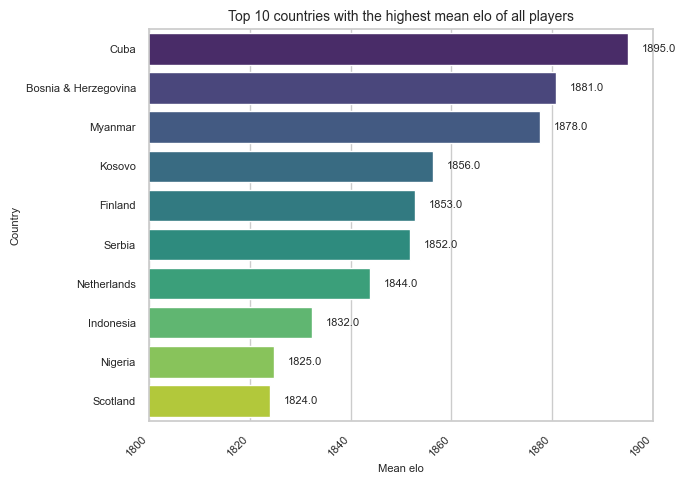

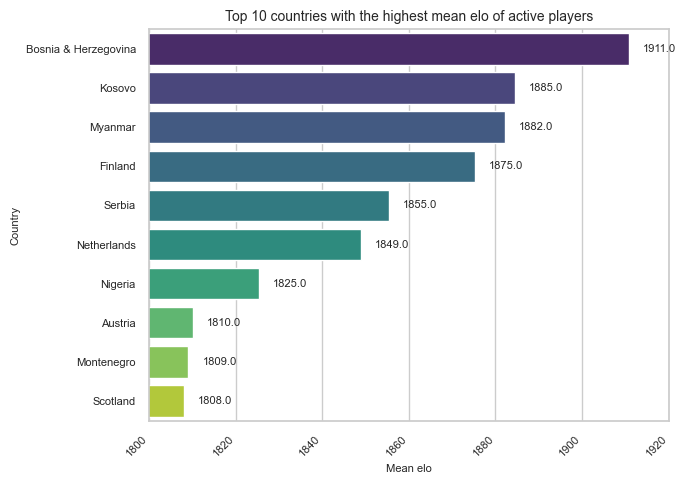

In [166]:
top_countries = stats_countries['mean_elo_all_players'].nlargest(10)

create_barplot(top_countries,'Mean elo','Country','Top 10 countries with the highest mean elo of all players',xlim=(1800,1900))

top_countries = stats_countries['mean_elo_active_players'].nlargest(10)
create_barplot(top_countries,'Mean elo','Country','Top 10 countries with the highest mean elo of active players',xlim=(1800,1920))


This is very interesting, Cuba has the highest mean elo with 1895. Cuba has always been a chess country every since the times of Jose Raul Capablanca, still I was not expecting them to have such a high mean elo. 

When it comes to active players only, european countries such as Bosnia and Herzegovina, Finland, Kosovo, Serbia and The Netherlands are at the top with a mean rating above 1850. The only african country in the top 10 is Nigeria.

The players in these countries are likely to be overrated compared to players in countries with lowest mean elo.
So if you want to win some free elo points, you know where to go!

Also these numbers can be explained by explained by the small percentage of teenagers among their players. Teenagers tend to be underrated.


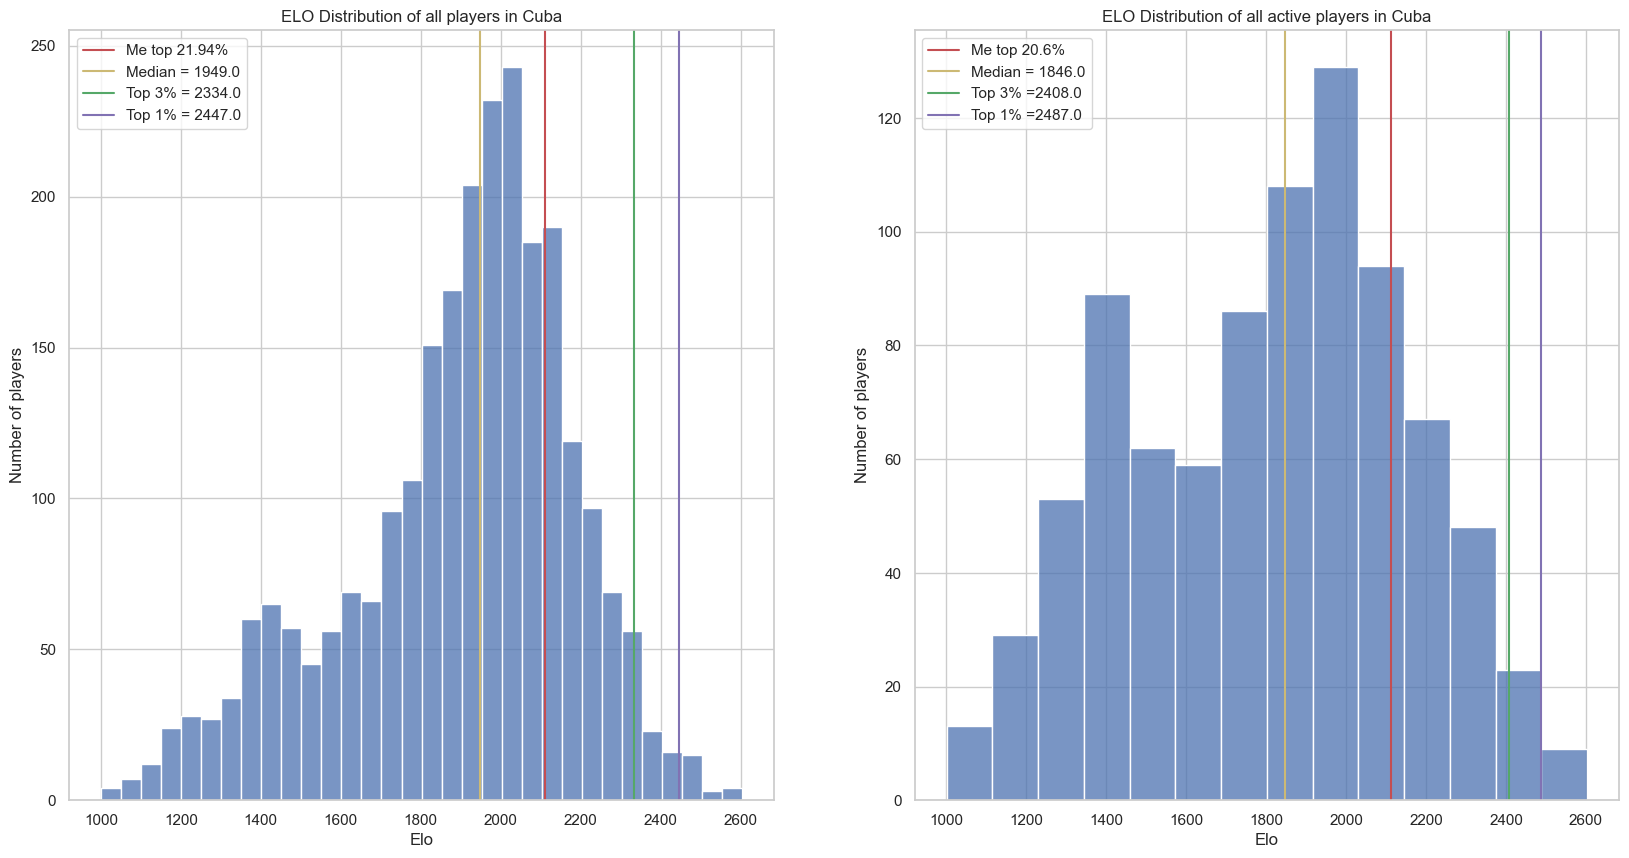

In [159]:
plot_distribution(FIDE[FIDE.Country=='Cuba'],FIDE_active[FIDE_active.Country=='Cuba'], 'Cuba')

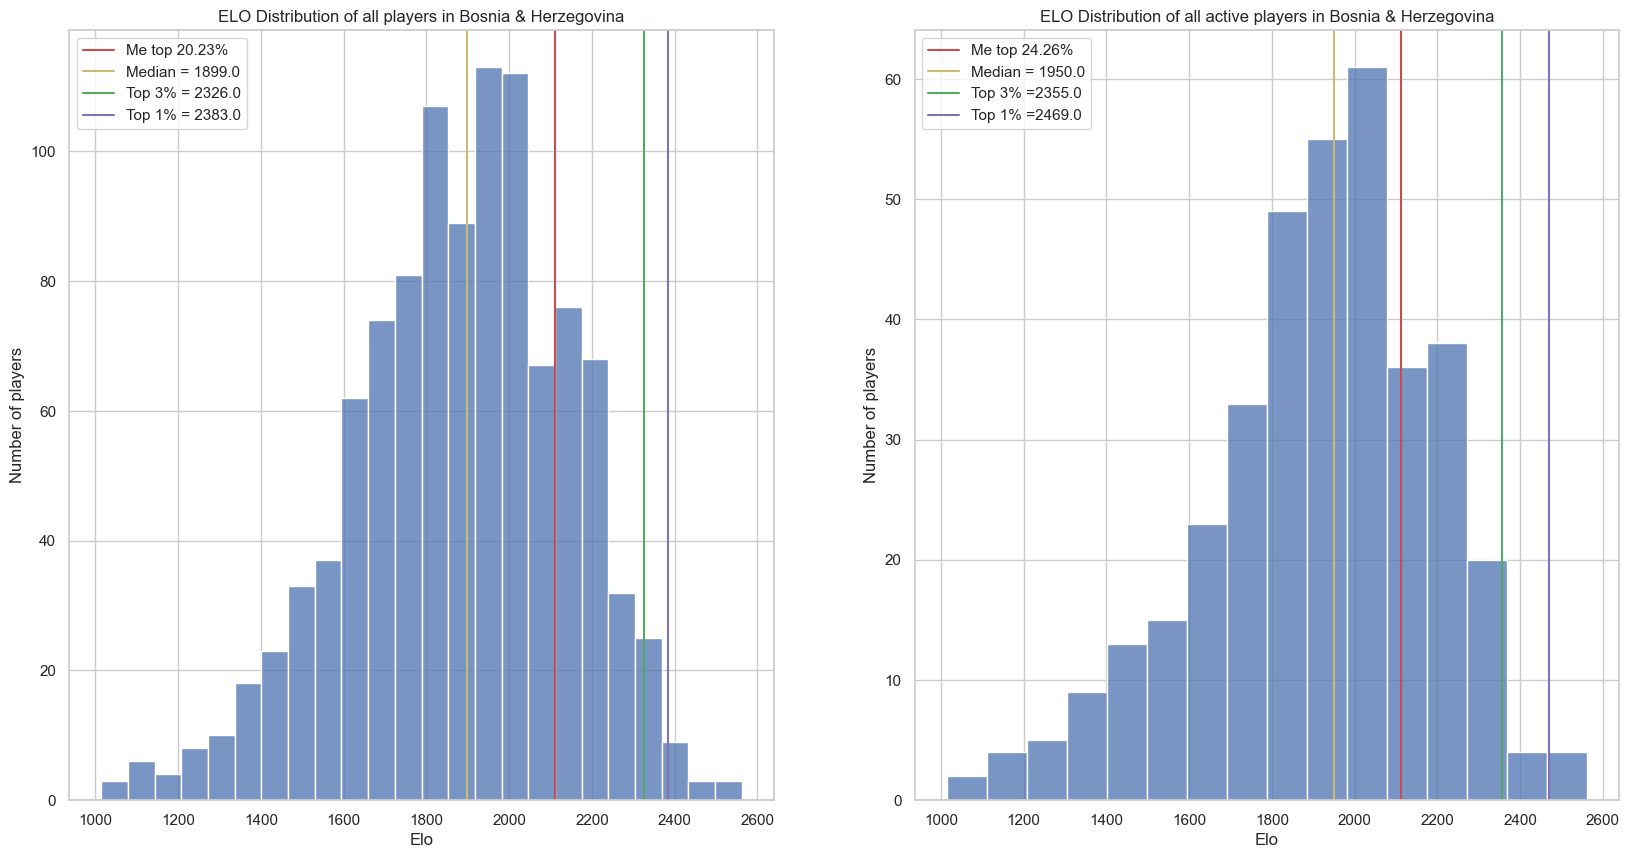

In [161]:
plot_distribution(FIDE[FIDE.Country=='Bosnia & Herzegovina'],FIDE_active[FIDE_active.Country=='Bosnia & Herzegovina'], 'Bosnia & Herzegovina')

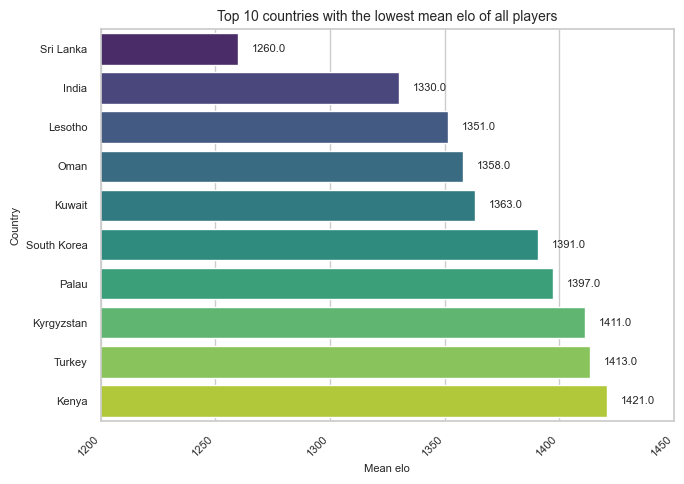

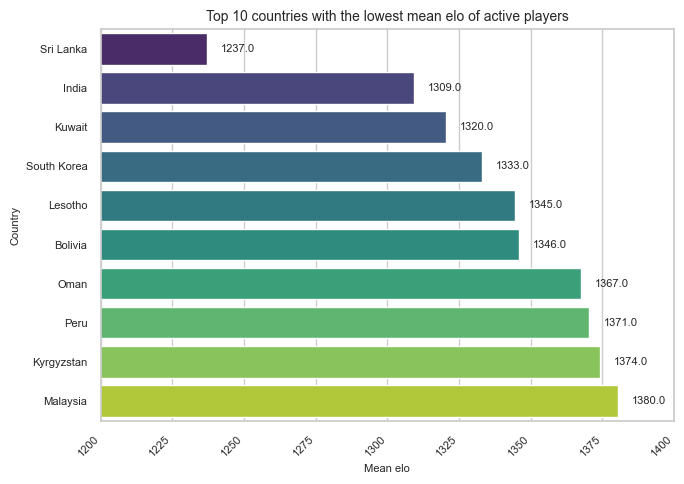

In [67]:
top_countries = stats_countries['mean_elo_all_players'].nsmallest(10)

create_barplot(top_countries,'Mean elo','Country','Top 10 countries with the lowest mean elo of all players',xlim=(1200,1450))
top_countries = stats_countries['mean_elo_active_players'].nsmallest(10)
create_barplot(top_countries,'Mean elo','Country','Top 10 countries with the lowest mean elo of active players',xlim=(1200,1400))


I'm not surprised to see India and Sri-Lanka in this top. This is well known in the chess world that indian players are very underrated, and this is why they come to play tournaments in Europe to win some elo points and get their titles as it is very hard to do so in India.

As opposed to before, the players in these countries are likely to be underrated. So if you don't want to lose your points, never play chess in India!

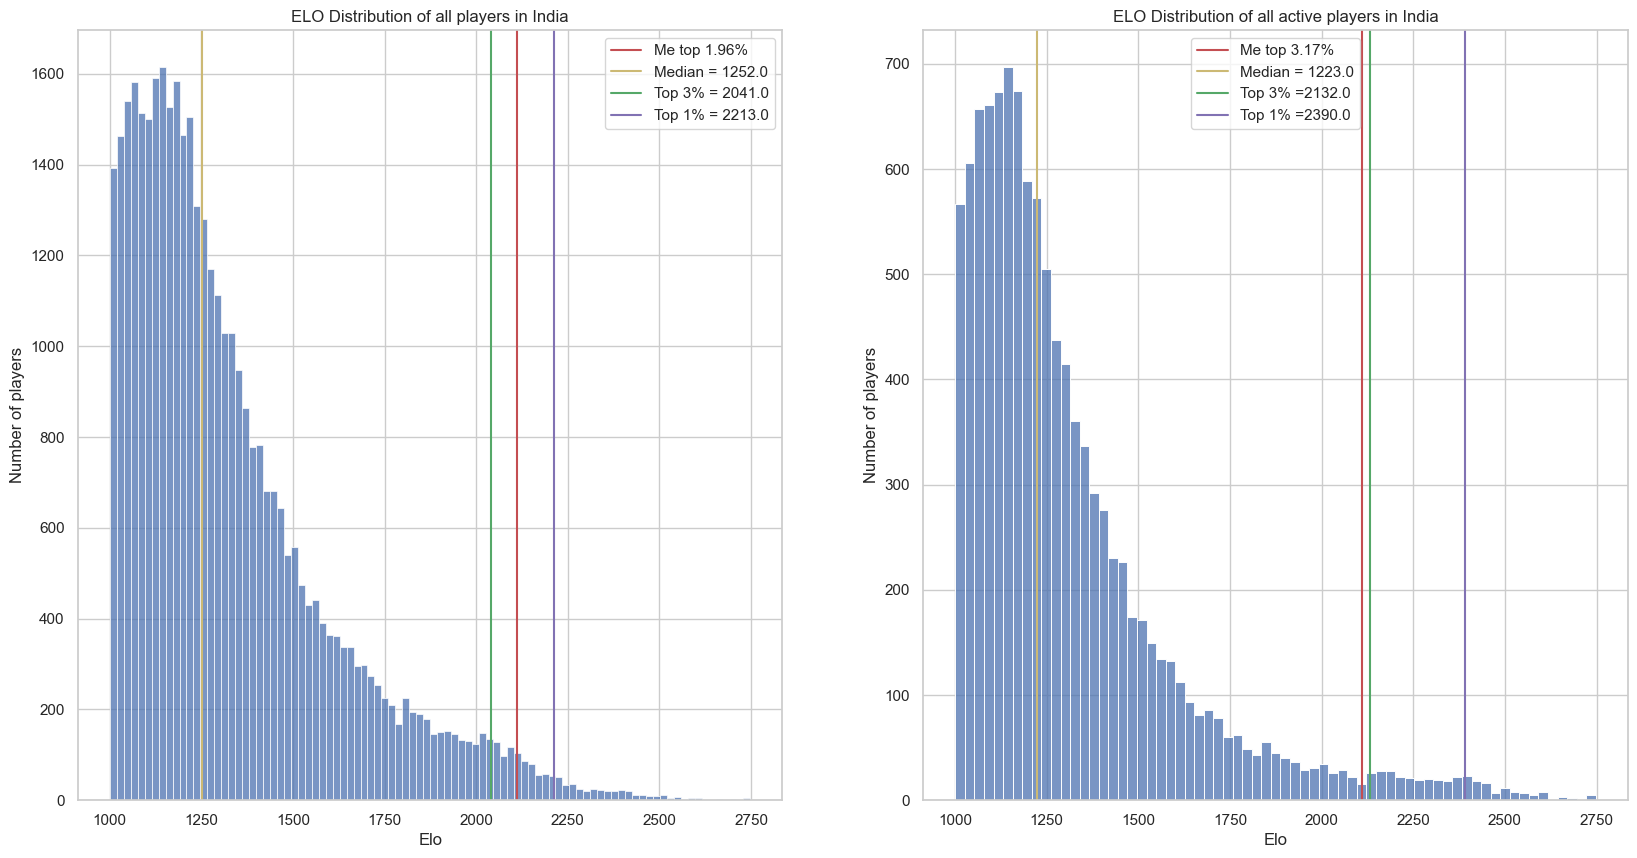

In [165]:
plot_distribution(FIDE[FIDE.Country=='India'],FIDE_active[FIDE_active.Country=='India'], 'India')

Ok we are done for now, thanks for reading! 
I would appreciate any feedback.